In [1]:
# for importing the data from 
import json
import requests
# for storing and analsis
import numpy as np
import pandas as pd
# for data visualisation 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
resp = requests.get("https://pomber.github.io/covid19/timeseries.json")
data = json.loads(resp.text)

In [3]:
resp

<Response [200]>

In [4]:
type(resp)

requests.models.Response

In [5]:
type(json.loads(resp.text))

dict

In [6]:
def flatten_json(y):
    out = {}
    def flatten(x, name=''):
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '_')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = x
    flatten(y)
    return out
    return out

In [7]:
df = pd.DataFrame(columns=['country', 'date', 'confirmed', 'deaths', 'recovered'])
df_totalCases = pd.DataFrame(columns=['country', 'date', 'confirmed', 'deaths', 'recovered'])
for key,value in data.items():
    dic_flattened = (flatten_json(d) for d in value)
    temp_df = pd.DataFrame(dic_flattened)
    temp_df.insert(0, 'country', key)
    df = df.append([temp_df], ignore_index = True)
    df_totalCases = df_totalCases.append([temp_df.tail(1)] , ignore_index = True)

In [8]:
df.dtypes

country      object
date         object
confirmed    object
deaths       object
recovered    object
dtype: object

In [9]:
df["date"]= pd.to_datetime(df["date"]) 
df['confirmed'] = df['confirmed'].astype(int)
df['deaths'] = df['deaths'].astype(int)
df['recovered'] = df['recovered'].astype(int)

In [10]:
df.dtypes

country              object
date         datetime64[ns]
confirmed             int32
deaths                int32
recovered             int32
dtype: object

In [11]:
df.describe()

,confirmed,deaths,recovered
count,16095.000000,16095.000000,16095.000000
mean,2323.155328,128.582044,573.261572
std,19381.898883,1198.041778,5062.095165
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,74.000000,1.000000,3.000000
max,699706.000000,36773.000000,83114.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16095 entries, 0 to 16094
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   country    16095 non-null  object        
 1   date       16095 non-null  datetime64[ns]
 2   confirmed  16095 non-null  int32         
 3   deaths     16095 non-null  int32         
 4   recovered  16095 non-null  int32         
dtypes: datetime64[ns](1), int32(3), object(1)
memory usage: 440.2+ KB


In [14]:
df['country'].nunique()

185

In [15]:
df

,country,date,confirmed,deaths,recovered
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0
3,Afghanistan,2020-01-25,0,0,0
4,Afghanistan,2020-01-26,0,0,0
...,...,...,...,...,...
16090,Yemen,2020-04-13,1,0,0
16091,Yemen,2020-04-14,1,0,0
16092,Yemen,2020-04-15,1,0,0
16093,Yemen,2020-04-16,1,0,0


In [16]:
df_totalCases

,country,date,confirmed,deaths,recovered
0,Afghanistan,2020-4-17,906,30,99
1,Albania,2020-4-17,539,26,283
2,Algeria,2020-4-17,2418,364,846
3,Andorra,2020-4-17,696,35,191
4,Angola,2020-4-17,19,2,5
...,...,...,...,...,...
180,Malawi,2020-4-17,17,2,3
181,South Sudan,2020-4-17,4,0,0
182,Western Sahara,2020-4-17,6,0,0
183,Sao Tome and Principe,2020-4-17,4,0,0


In [17]:
top10 = df_totalCases.sort_values(by=['confirmed'], ascending  =False, ignore_index=True).head(10)


In [18]:
top10

,country,date,confirmed,deaths,recovered
0,US,2020-4-17,699706,36773,58545
1,Spain,2020-4-17,190839,20002,74797
2,Italy,2020-4-17,172434,22745,42727
3,France,2020-4-17,149130,18703,35006
4,Germany,2020-4-17,141397,4352,83114
5,United Kingdom,2020-4-17,109769,14607,394
6,China,2020-4-17,83760,4636,77552
7,Iran,2020-4-17,79494,4958,54064
8,Turkey,2020-4-17,78546,1769,8631
9,Belgium,2020-4-17,36138,5163,7961


[Text(0, 0, 'US'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Iran'),
 Text(0, 0, 'Turkey'),
 Text(0, 0, 'Belgium')]

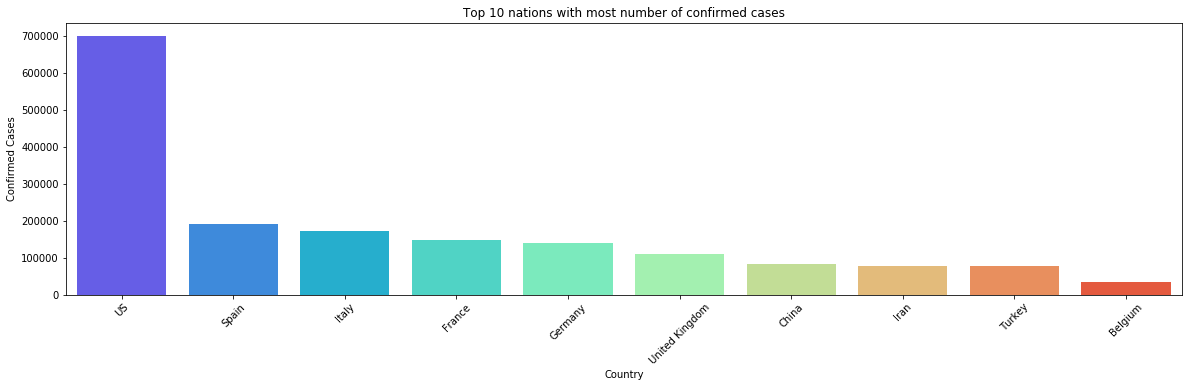

In [19]:
plt.figure(figsize=(20,5))
chart = sns.barplot(
    data=top10,
    x= 'country',
    y = 'confirmed',
    palette='rainbow'
)
chart.set(xlabel='Country', ylabel='Confirmed Cases', title = 'Top 10 nations with most number of confirmed cases')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [20]:
temp10 = df_totalCases.sort_values(by=['recovered'], ascending  =False, ignore_index=True).head(10)
temp10

,country,date,confirmed,deaths,recovered
0,Germany,2020-4-17,141397,4352,83114
1,China,2020-4-17,83760,4636,77552
2,Spain,2020-4-17,190839,20002,74797
3,US,2020-4-17,699706,36773,58545
4,Iran,2020-4-17,79494,4958,54064
5,Italy,2020-4-17,172434,22745,42727
6,France,2020-4-17,149130,18703,35006
7,Switzerland,2020-4-17,27078,1327,16400
8,Brazil,2020-4-17,33682,2141,14026
9,Canada,2020-4-17,32813,1354,10545


[Text(0, 0, 'Germany'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'US'),
 Text(0, 0, 'Iran'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Switzerland'),
 Text(0, 0, 'Brazil'),
 Text(0, 0, 'Canada')]

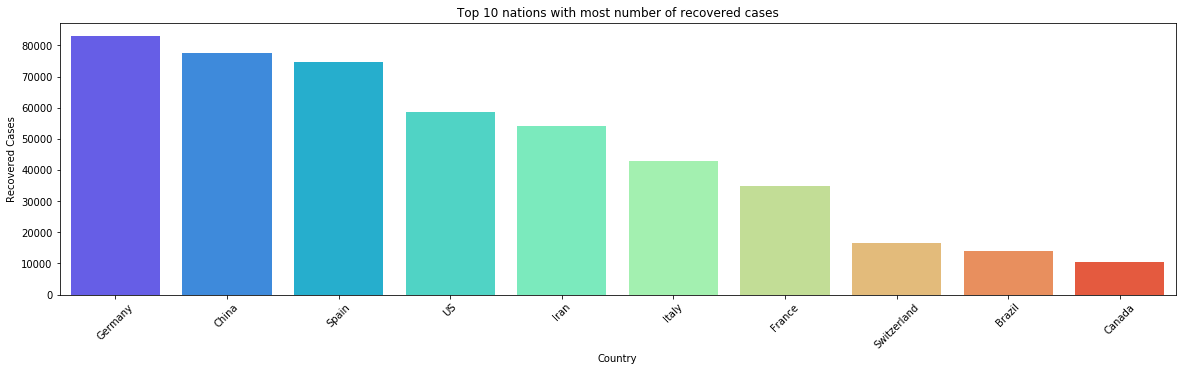

In [21]:
plt.figure(figsize=(20,5))
chart = sns.barplot(
    data=temp10,
    x= 'country',
    y = 'recovered',
    palette='rainbow'
)
chart.set(xlabel='Country', ylabel='Recovered Cases', title = 'Top 10 nations with most number of recovered cases')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

[Text(0, 0, 'US'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Iran'),
 Text(0, 0, 'Turkey'),
 Text(0, 0, 'Belgium')]

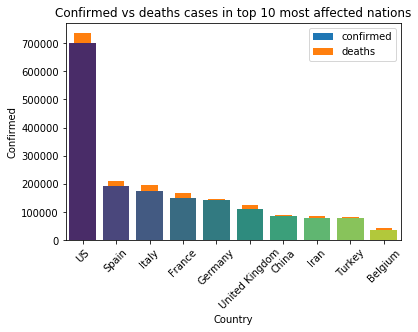

In [22]:
top10[['confirmed','deaths','country']].plot(kind='bar', stacked=True)
chart = sns.barplot(
    data=top10,
    x= top10['country'],
    y = top10['confirmed'],
    palette='viridis'
)
chart.set(xlabel='Country', ylabel='Confirmed', title = 'Confirmed vs deaths cases in top 10 most affected nations')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [23]:
sns.set_style("whitegrid")

[Text(0, 0, 'US'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Iran'),
 Text(0, 0, 'Turkey'),
 Text(0, 0, 'Belgium')]

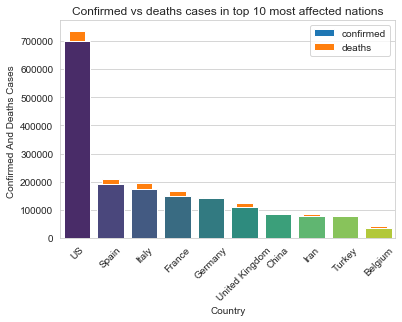

In [24]:
top10[['confirmed','deaths','country']].plot(kind='bar', stacked=True)
chart = sns.barplot(
    data=top10,
    x= top10['country'],
    y = top10['confirmed'],
    palette='viridis'
)
chart.set(xlabel='Country', ylabel='Confirmed And Deaths Cases ', title = 'Confirmed vs deaths cases in top 10 most affected nations')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

[Text(0, 0.5, 'Number of cases')]

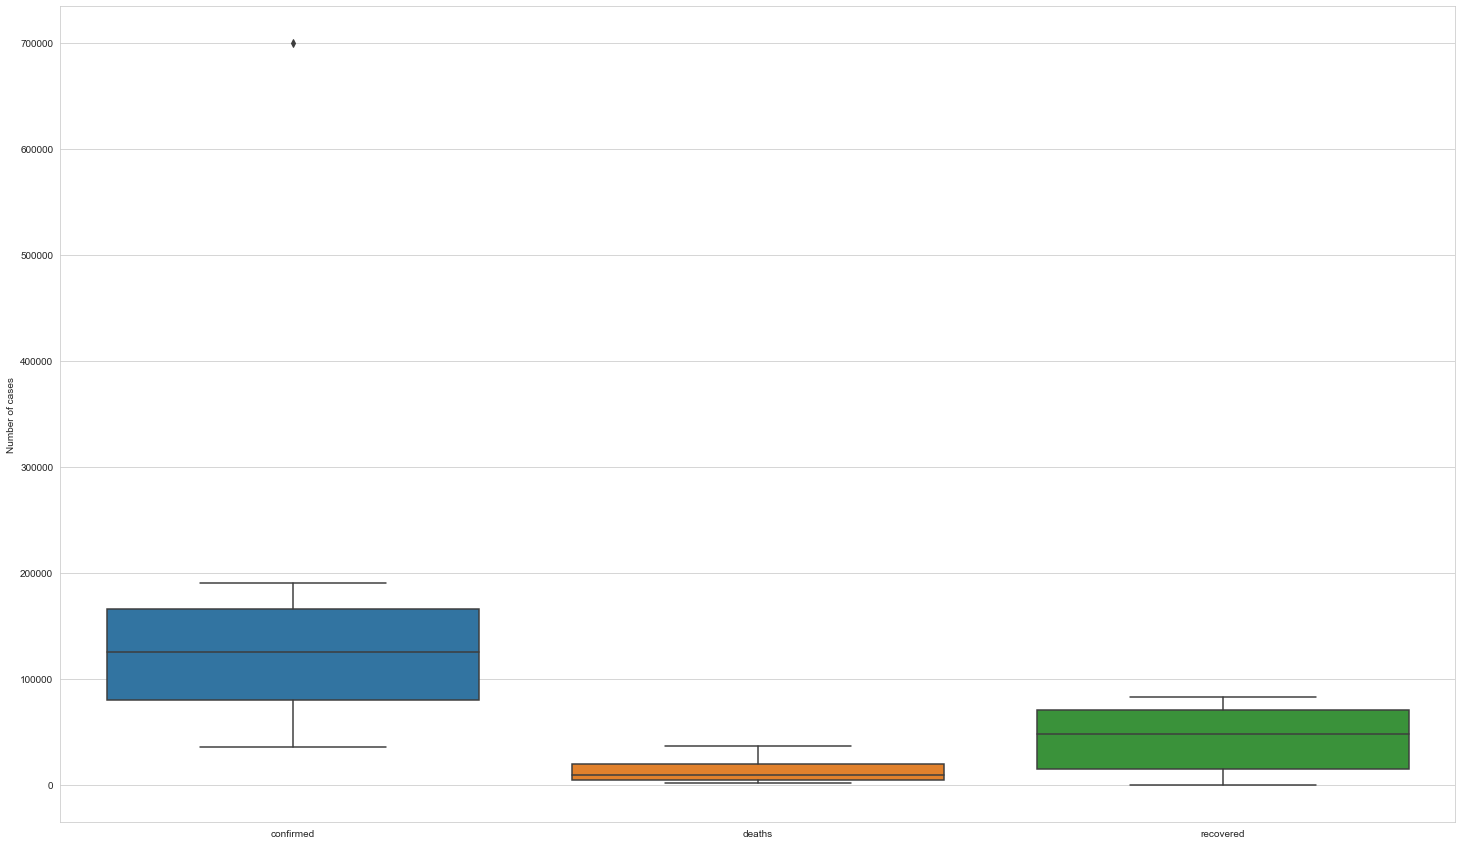

In [25]:
#top10.plot.box()
plt.figure(figsize=(25,15))
sns.boxplot(data = top10).set(
    ylabel='Number of cases'
)

In [26]:
sns.set(font_scale=3)

(0, 200000)

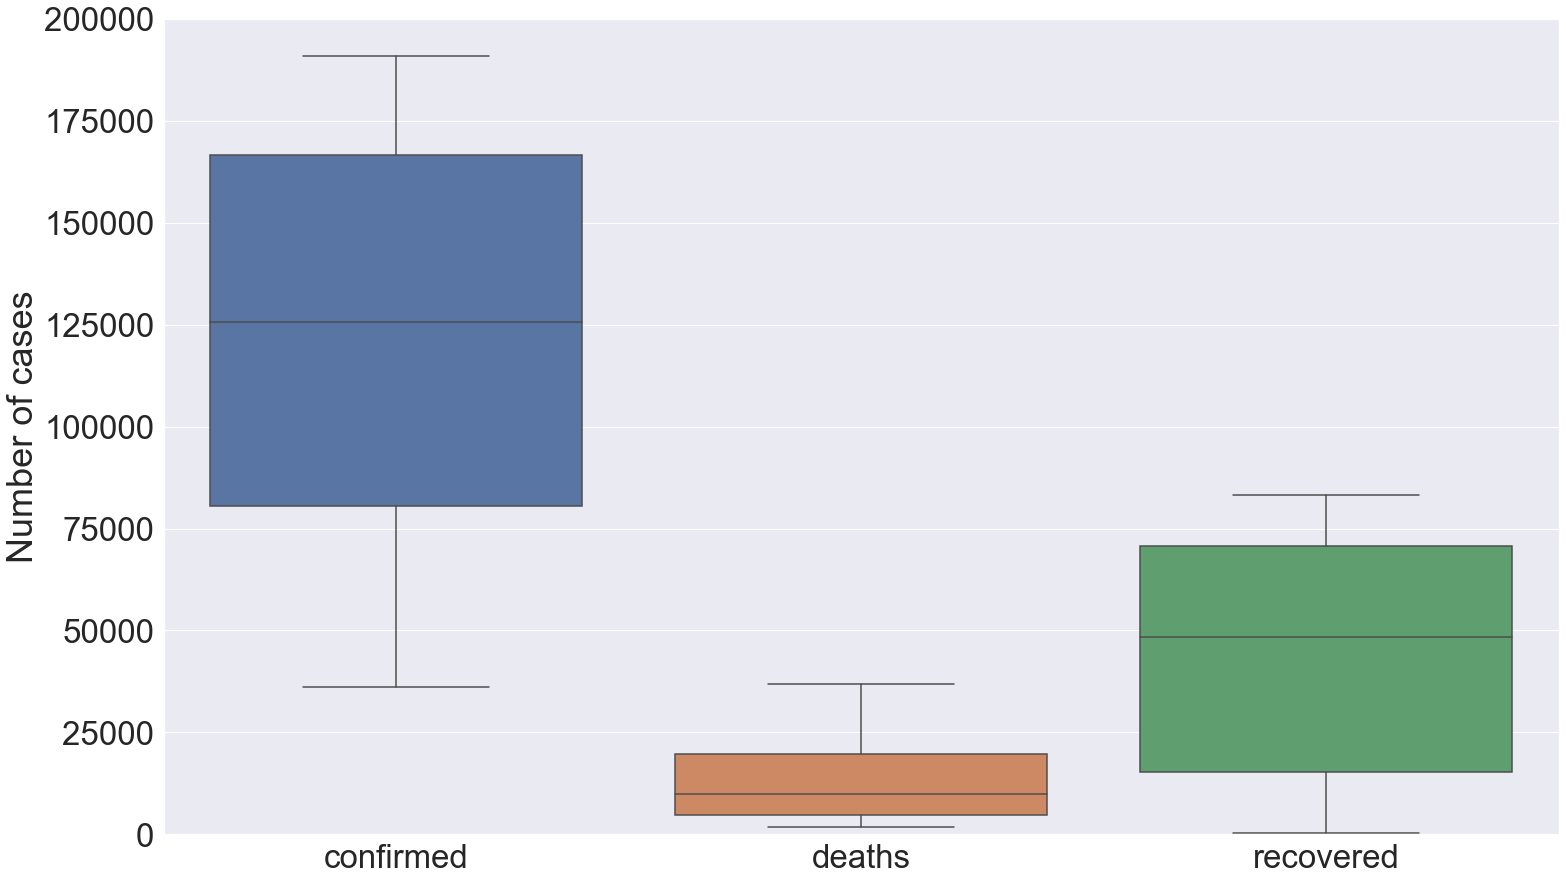

In [29]:
#top10.plot.box()
plt.figure(figsize=(25,15))
sns.boxplot(data = top10).set(
    ylabel='Number of cases'
)
plt.ylim(0, 200000)

In [30]:
sns.set(font_scale=1)

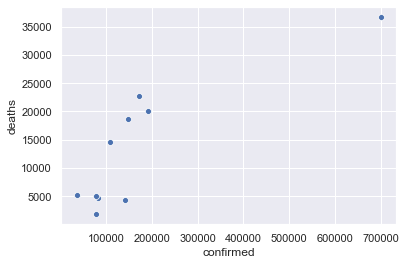

In [31]:
sns.scatterplot(x="confirmed", y="deaths", data=top10)


Text(0, 0.5, 'Death Cases')

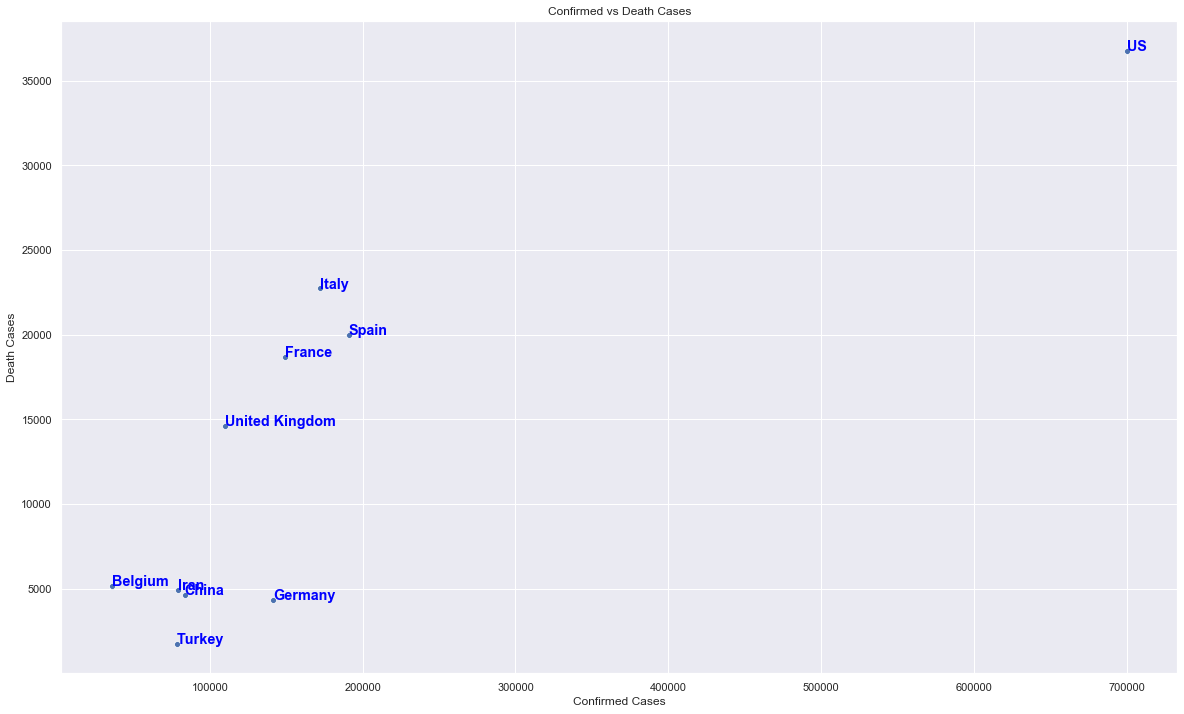

In [32]:
plt.figure(figsize=(20,12))
p1 = sns.scatterplot(x="confirmed", y="deaths", data=top10)

for line in range(0,top10.shape[0]):
     p1.text(top10.confirmed[line]+0.01, top10.deaths[line], 
     top10.country[line], horizontalalignment='left', 
     size='large', color='blue', weight='semibold')

plt.title('Confirmed vs Death Cases')
# Set x-axis label
plt.xlabel('Confirmed Cases')
# Set y-axis label
plt.ylabel('Death Cases')

In [34]:
df_totalCases = df_totalCases.assign(active = df_totalCases['confirmed'] - df_totalCases['deaths'],fatality_rate = 100 - ((df_totalCases['confirmed'] - df_totalCases['deaths'])/df_totalCases['confirmed'])*100) 

In [35]:
top10 = top10.assign(active = top10['confirmed'] - top10['deaths'],fatality_rate = 100 - ((top10['confirmed'] - top10['deaths'])/top10['confirmed'])*100 )

In [36]:
top10

,country,date,confirmed,deaths,recovered,active,fatality_rate
0,US,2020-4-17,699706,36773,58545,662933,5.25549
1,Spain,2020-4-17,190839,20002,74797,170837,10.4811
2,Italy,2020-4-17,172434,22745,42727,149689,13.1906
3,France,2020-4-17,149130,18703,35006,130427,12.5414
4,Germany,2020-4-17,141397,4352,83114,137045,3.07786
5,United Kingdom,2020-4-17,109769,14607,394,95162,13.307
6,China,2020-4-17,83760,4636,77552,79124,5.53486
7,Iran,2020-4-17,79494,4958,54064,74536,6.23695
8,Turkey,2020-4-17,78546,1769,8631,76777,2.25218
9,Belgium,2020-4-17,36138,5163,7961,30975,14.2869


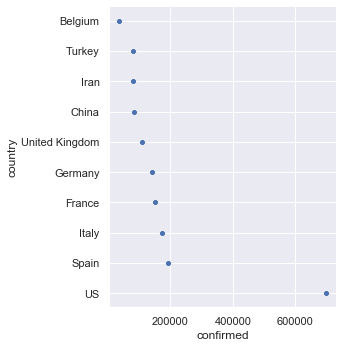

In [37]:
sns.relplot(x ="confirmed" ,y ="country"  , data =top10 )

In [38]:
plt.style.use('seaborn')

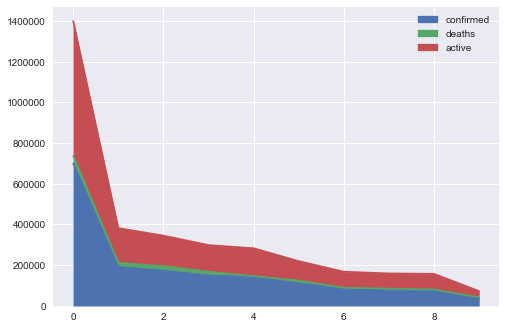

In [39]:
top10[['confirmed','deaths','active']].plot.area()

In [40]:
temp = df[(df['country']=='US') & (df['date'] > '2020-3-1')].reset_index()
temp

,index,country,date,confirmed,deaths,recovered
0,13612,US,2020-03-02,98,6,7
1,13613,US,2020-03-03,118,7,7
2,13614,US,2020-03-04,149,11,7
3,13615,US,2020-03-05,217,12,7
4,13616,US,2020-03-06,262,14,7
5,13617,US,2020-03-07,402,17,7
6,13618,US,2020-03-08,518,21,7
7,13619,US,2020-03-09,583,22,7
8,13620,US,2020-03-10,959,28,8
9,13621,US,2020-03-11,1281,36,8


Text(0, 0.5, 'Confirmed Cases')

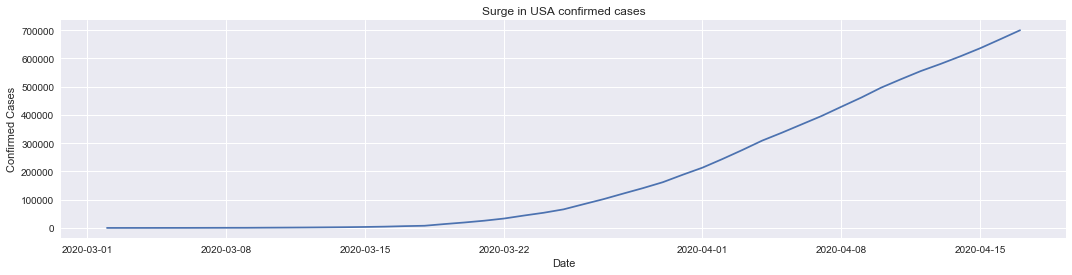

In [41]:
plt.figure(figsize=(18,4))
ax = sns.lineplot(x="date", y="confirmed",data=temp)
plt.title('Surge in USA confirmed cases')
# Set x-axis label
plt.xlabel('Date')
# Set y-axis label
plt.ylabel('Confirmed Cases')